In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

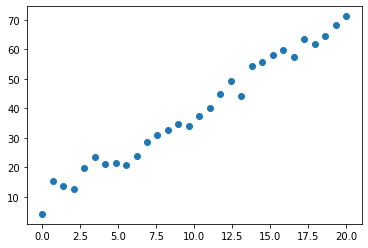

In [2]:
def f(x):
    return 3*x + 4 + random.uniform(-0.5, 10)
vf = np.vectorize(f)
X = np.linspace(0, 20, 30)
X_test = np.linspace(0, 20, 100)
y = vf(X)
plt.scatter(X, y)

In [3]:
X = np.c_[X]
X_test = np.c_[X_test]
y = np.c_[y]

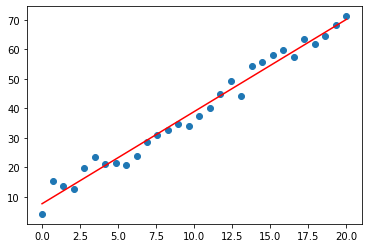

In [4]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

predict = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, predict, 'r-')

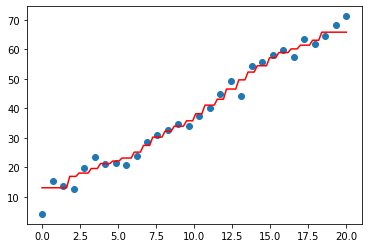

In [5]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
model.fit(X, y)

predict = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, predict, 'r-')

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([-1.91010798,  0.02883692, -0.8844269 ,  0.02216644, -5.20958656])

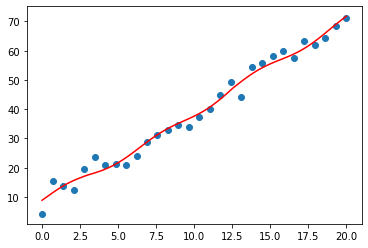

In [7]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(random_state=1, max_iter=5000, activation='relu', solver='adam', hidden_layer_sizes=(6,3,))
X_2 = np.c_[X[:, 0], X[:, 0] * X[:, 0], np.sin(X[:, 0])]
X_test_2 = np.c_[X_test[:, 0], X_test[:, 0] * X_test[:, 0], np.sin(X_test[:, 0])]
model.fit(X_2, y[:, 0])

predict = model.predict(X_test_2)
plt.scatter(X, y)
plt.plot(X_test, predict, 'r-')

{'activation': 'relu', 'hidden_layer_sizes': 4, 'max_iter': 4500, 'solver': 'adam'}


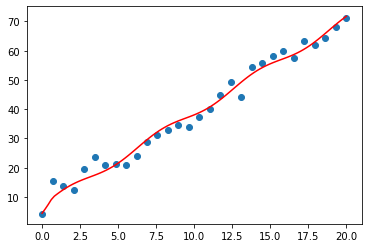

In [38]:
from sklearn.model_selection import GridSearchCV
import itertools
import warnings
warnings.filterwarnings('ignore')

model = MLPRegressor(random_state=1, max_iter=5000, activation='relu', solver='adam', hidden_layer_sizes=(6,3,))
X_2 = np.c_[X[:, 0], X[:, 0] * X[:, 0], np.sin(X[:, 0])]
X_test_2 = np.c_[X_test[:, 0], X_test[:, 0] * X_test[:, 0], np.sin(X_test[:, 0])]

param_grid = {
    'max_iter': np.arange(2000, 5000, step=500),
    'solver': ['lbfgs', 'adam'],
    'activation': ['relu'],
    'hidden_layer_sizes': list(range(1, 10)) + list(itertools.product(range(1, 5), range(1, 3)))
}
knn_gscv = GridSearchCV(model, param_grid, cv=5)
knn_gscv.fit(X_2,  y[:, 0])

predict = knn_gscv.predict(X_test_2)
plt.scatter(X, y)
plt.plot(X_test, predict, 'r-')
print(knn_gscv.best_params_)